In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Evaluating an expression carefully

Consider the following _complicated_ expression:

$$ b(u) = \frac{1}{u^3} \sqrt{ (4 + u^4) \sqrt{1+ u^4} - 3 u^4 - 4)} $$

Notice what happens when we try a naive evaluation of the expression

In [138]:
u = np.arange(0, 0.3, 0.0001)
b_naive = lambda u: 1/u**3 * np.sqrt( (4 + u**4) * np.sqrt( 1+ u**4) - 3*u**4 - 4)

//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


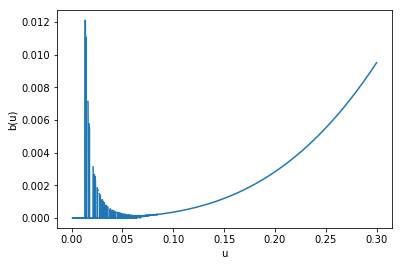

In [139]:
plt.plot(u, b_naive(u))
plt.xlabel('u')
plt.ylabel('b(u)')

The bizarre behaviour for $ u < 0.06 $ is due to round-off error.

### Taylor series

Taylor series can help us a lot in this situation and SymPy can help us determine those coefficients. 

In [140]:
import sympy as sp
sp.init_printing()

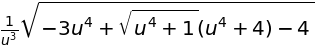

In [141]:
b_expression = sp.S('1/ u^3 * sqrt( (4 + u^4) * sqrt(1+ u^4)-3*u^4-4) ')
b_expression

In [142]:
b_series = sp.series(b_expression, n=20)
b_series

In [143]:
b_taylor = sp.lambdify('u', b_series.removeO())

//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


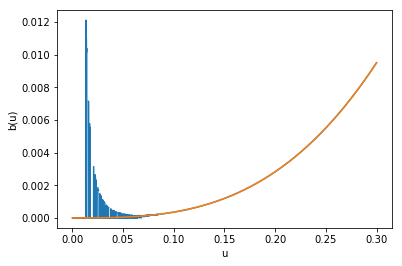

In [144]:
plt.plot(u, b_naive(u))
plt.plot(u, b_taylor(u))
plt.xlabel('u')
plt.ylabel('b(u)')

### Considering the absolute difference

//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


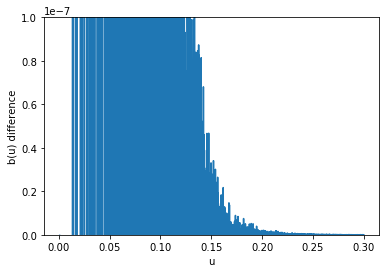

In [145]:
plt.plot(u, b_naive(u) - b_taylor(u))
plt.xlabel('u')
plt.ylabel('b(u) difference')
plt.ylim(0, 1e-7)